In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [56]:
r1 = pd.read_csv('user_result/552_final_April 30, 2021_05.18.csv')
r2 = pd.read_csv('user_result/552_final_April+30,+2021_08.43.csv')
all = pd.read_csv('user_study/user_test.csv')

In [57]:
all.groupby('label').nunique()

,Unnamed: 0,Unnamed: 0.1,text,class
label,,,,
0,36,36,36,1
1,36,36,36,1
2,36,36,36,1
3,36,36,36,1
4,36,36,36,1


In [12]:
# d0 = all[all['label'] == 0]
# d1 = all[all['label'] == 1]
# d2 = all[all['label'] == 2]
# d3 = all[all['label'] == 3]
# d4 = all[all['label'] == 4]

In [13]:
# d0 = d0.sample(36)
# d1 = d1.sample(36)
# d3 = d3.sample(36)
# d4 = d4.sample(36)

In [16]:
all_final = pd.concat([d0,d1,d2,d3,d4])

In [58]:
all_final.to_csv('user_test.csv', index=False)

In [43]:
r1a = r1.iloc[:,19:-1]
r2a = r2.iloc[:,19:-1]

In [44]:
r1b = r1a.drop(1)
r2b = r2a.drop(1)

In [45]:
for i in range(len(r1b.iloc[0, :])):
    r1b.iloc[0,i] = r1b.iloc[0,i].split('_')[0]

for i in range(len(r2b.iloc[0, :])):
    r2b.iloc[0,i] = r2b.iloc[0,i].split('_')[0]

In [30]:
r1b.head()

,QID17,QID18,QID19,QID21,QID20,QID22,QID23,QID24,QID25,QID26,...,QID257,QID258,QID259,QID260,QID261,QID262,QID263,QID264,QID265,QID266
0,99,24,152,134,37,212,135,52,9,144,...,122,210,76,249,167,239,2,247,209,220
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
r1b_header = r1b.iloc[0]
r1b = r1b[1:] 
r1b.columns = r1b_header

In [47]:
r2b_header = r2b.iloc[0]
r2b = r2b[1:] 
r2b.columns = r2b_header

In [48]:
r1c = r1b.T
r2c = r2b.T

In [49]:
for y in r1c:
    a = [[y for y in x if pd.notna(y)] for x in r1c.values.tolist()]

In [50]:
for y in r2c:
    b = [[y for y in x if pd.notna(y)] for x in r2c.values.tolist()]

In [51]:
d = {}
for i in range(len(r1c.index)):
    d[r1c.index[i]] = a[i]

In [52]:
for i in range(len(r2c.index)):
    d[r2c.index[i]].extend(b[i])

In [53]:
all['Unnamed: 0'] = all['Unnamed: 0'].astype(str)

In [54]:
y_label = []
y_test = []
y_human = []
for k in d.keys():
    for p in d[k]:
        try:
            y_label.append(all[all['Unnamed: 0']==k]['label'].values[0])
            y_test.append(all[all['Unnamed: 0']==k]['class'].values[0])
            if p == '1':
                y_human.append(1)
            else:
                y_human.append(0)
        except:
            continue

In [40]:
result = pd.DataFrame({'y_label':y_label, 'y_test':y_test, 'y_human':y_human})

In [85]:
result

,y_label,y_test,y_human
0,3,1,0
1,3,1,1
2,3,1,1
3,2,1,0
4,2,1,1
...,...,...,...
703,2,1,0
704,2,1,1
705,2,1,0
706,2,1,1


#### User Performance

In [61]:
df00 = result[result['y_label']==0]
df03 = result[result['y_label']==1]
df05 = result[result['y_label']==2]
df07 = result[result['y_label']==3]
df10 = result[result['y_label']==4]

In [70]:
user03 = pd.concat([df03, df00])
user05 = pd.concat([df05, df00])
user07 = pd.concat([df07, df00])
user10 = pd.concat([df10, df00])

In [75]:
acc03 = accuracy_score(user03['y_test'], user03['y_human'])
prec03 = precision_score(user03['y_test'], user03['y_human'])
rec03 = recall_score(user03['y_test'], user03['y_human'])

acc05 = accuracy_score(user05['y_test'], user05['y_human'])
prec05 = precision_score(user05['y_test'], user05['y_human'])
rec05 = recall_score(user05['y_test'], user05['y_human'])

acc07 = accuracy_score(user07['y_test'], user07['y_human'])
prec07 = precision_score(user07['y_test'], user07['y_human'])
rec07 = recall_score(user07['y_test'], user07['y_human'])

acc10 = accuracy_score(user10['y_test'], user10['y_human'])
prec10 = precision_score(user10['y_test'], user10['y_human'])
rec10 = recall_score(user10['y_test'], user10['y_human'])

In [83]:
temp_list = [0.3, 0.5, 0.7, 1.0]
acc_list = [acc03, acc05, acc07, acc10]
prec_list = [prec03, prec05, prec07, prec10]
rec_list = [rec03, rec05, rec07, rec10]

In [84]:
print(acc_list, prec_list, rec_list)

[0.5476190476190477, 0.5714285714285714, 0.545774647887324, 0.5551724137931034] [0.5476190476190477, 0.5581395348837209, 0.525, 0.5476190476190477] [0.47586206896551725, 0.5217391304347826, 0.4666666666666667, 0.48936170212765956]


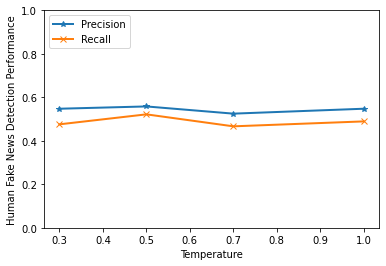

In [87]:
#plt.plot(temp_list, acc_list, label = 'Accuracy', marker = 'o', markersize=8, lw=2)
plt.plot(temp_list, prec_lsit, label = 'Precision', marker = '*',lw=2)
plt.plot(temp_list, rec_list, label = 'Recall', marker = 'x',lw=2)
#plt.plot(temp_list, auc_list, label = 'AUC Score', marker = 'v',lw=2)
plt.xlabel('Temperature')
plt.ylabel('Human Fake News Detection Performance')
plt.yticks([0, 0.2,0.4, 0.6, 0.8, 1.0])
plt.legend(loc='upper left')
plt.show()